In [209]:
# Import built-in and third-party libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.io as pio
import sdv
import seaborn as sns
import sys
import warnings
import multivariate as umvar

In [210]:
# Import user-defined modules
def find_dir(dir, root=os.path.abspath('/')):
    """
    Returns path of the input directory, moving backwards along 
    the cwd path. Searches until the root directory is reached.
    
    Returns None if the file system root is reached.
    """
    cd=os.getcwd() 
    while True:
        listdir=os.listdir(cd)
        if dir in listdir:
            return cd
        elif (os.path.basename(cd)==root) or (cd==os.path.abspath('/')):
            return None
        cd=os.path.dirname(cd)

# Add utils path to sys.path
utils_path=find_dir('utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)

# Load user-defined utilities
import utilslab as u
import plottingok as uplot

In [211]:
# Warnings
# warnings.simplefilter('ignore')
warnings.simplefilter('default')

# Set Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option ('display.max_rows', 40)
pd.set_option('display.float_format', '{:f}'.format)

# Set aspects of the visual theme for all matplotlib and seaborn plots
sns.set_theme()

In [212]:
# Load radiomics dataset
dataset_dirpath = './'
dataset_filename = 'radiogenomics.csv'
dataset_filepath = os.path.join(dataset_dirpath, dataset_filename)

df = pd.read_csv(  
    filepath_or_buffer=dataset_filepath, 
    sep=',', 
    on_bad_lines='warn', 
    index_col=False, 
    header=0, 
)

In [213]:
# Drop unnecessary columns
columns = ['id', 'Histology', 'Recurrence']
df.drop(columns=columns, inplace=True)

In [214]:
# Save features in dataframe X, and target in series y
target = 'Hist_binary'

X = df.drop(columns=target).copy()
y = df[target].copy()

cond = df[target] == 0

In [215]:
# Drop too highly correlated features
high_corr_thrsh = .95

corr = X.corr().abs()
upper_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
columns = [column for column in upper_corr.columns if any(upper_corr[column] > high_corr_thrsh)]

X.drop(columns=columns, inplace=True)

In [216]:
target='Hist_binary'

target_corr_df=df.corr()[[target]].iloc[:-1].sort_values(by=target, ascending=False)
target_corr_df

,Hist_binary
original_gldm_SmallDependenceHighGrayLevelEmphasis,0.306653
original_gldm_SmallDependenceEmphasis,0.302281
original_gldm_LowGrayLevelEmphasis,0.297383
original_glszm_HighGrayLevelZoneEmphasis,0.295807
original_glcm_ClusterShade,0.293627
...,...
original_glszm_LowGrayLevelZoneEmphasis,-0.295807
original_gldm_HighGrayLevelEmphasis,-0.297383
original_glcm_SumAverage,-0.299660
original_glcm_JointAverage,-0.299660


In [217]:
low_corr_thrsh=0.01

target_corr_df.loc[np.abs(target_corr_df['Hist_binary'])<low_corr_thrsh]

,Hist_binary
original_gldm_DependenceNonUniformity,0.007255
original_shape_SurfaceVolumeRatio,-0.005967
original_shape_Elongation,-0.006601
original_glcm_Correlation,-0.007503
original_glcm_MCC,-0.007740


In [218]:
lista_low = ['original_gldm_DependenceNonUniformity', 'original_shape_SurfaceVolumeRatio', 'original_shape_Elongation', 'original_glcm_Correlation']
X.drop(columns=lista_low, inplace=True)
X

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
0,0.481237,8.963171,18.625263,20.000000,17.262677,1294.708333,12.943898,0.648684,885.588414,-2.058225,0.508785,1511.575170,0.976329,1.783631,1.872169,0.513958,-0.308155,0.473524,-2.060159,-0.768836,0.678778,-0.025348,0.677123,0.321736,-0.102377,0.409092,5.295078,0.050038,30.946873,251.659108,603.638700,163.664210,0.010472,0.004976,0.561731,3.025883,7.408606,18.761785,4.570311,2.967303,0.308620,0.238556,2.600000,0.520000,2.800000,179594.200000,542767.600000,88800.850000,0.280000,0.450001,1.200002,0.262501,2.321928,0.003779,132.498906
1,0.656833,12.548555,19.104627,19.849433,20.518285,2206.875000,13.996240,0.704976,1162.773148,-2.268186,0.387717,3269.172636,0.986424,1.782858,2.092151,0.400795,-0.622675,-0.305450,-2.930270,-0.653192,0.694786,0.271356,0.615475,0.296871,-0.102160,0.394095,5.081770,0.047129,44.406488,307.618621,489.820949,262.068039,0.009624,0.004301,0.534186,2.890715,11.124795,18.995670,9.157077,3.059661,0.301836,0.237144,6.250000,0.781250,3.625000,315379.500000,656680.500000,230054.250000,0.250000,0.451389,1.805556,0.112847,2.155639,0.003581,559.922433
2,0.657195,11.036269,16.792985,15.264338,20.248457,1436.000000,12.094665,0.741714,829.883652,-2.321611,0.436055,3197.995434,0.751157,1.899435,1.621511,0.470867,-1.102179,-1.255896,-2.324966,0.281601,0.527083,0.324180,0.326005,0.182866,-0.084167,0.282672,4.472588,0.073078,60.782751,395.031615,429.610997,386.386770,0.012650,0.005038,0.501073,2.495675,17.421118,21.052801,16.513197,3.076713,0.269657,0.213045,7.222222,0.802469,3.666667,154214.111100,182135.111100,147233.861100,0.259259,0.485063,1.940252,0.121266,2.281036,0.006186,202.513315
3,0.387075,8.513651,21.994859,19.849433,18.867962,1343.500000,13.736166,0.564827,1042.462757,-1.948213,0.524183,2189.719719,0.875061,2.044097,1.447629,0.546346,-0.820627,-0.996245,-1.951678,0.216973,0.720432,0.412172,0.475419,0.209598,-0.130453,0.412451,5.060750,0.043147,54.044600,326.402768,410.911872,305.275492,0.015271,0.006158,0.501596,2.547220,11.324419,15.760823,10.215318,3.041275,0.286102,0.243671,7.222222,0.802469,3.666667,120433.222200,169391.555

In [219]:
X_norm = u.normalize(X)
X.corr()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
original_shape_Flatness,1.000000,0.255202,-0.215057,-0.052759,-0.078464,0.162651,0.063303,0.476958,0.054039,-0.124230,-0.198726,0.206270,-0.026409,0.112809,-0.004119,-0.083362,-0.272610,-0.276405,-0.079507,0.102682,-0.017095,0.241813,-0.086939,-0.069522,-0.020866,-0.036395,-0.221424,0.223048,0.029533,0.202666,-0.113236,0.317485,0.032923,-0.049934,-0.120137,-0.161225,0.263143,0.119233,0.286763,0.118982,-0.050402,-0.110766,0.190908,0.195764,0.242897,0.152292,0.092185,0.195521,0.255258,0.101207,0.185831,-0.110960,-0.192393,0.159124,0.025197
original_shape_LeastAxisLength,0.255202,1.000000,0.856392,0.844597,0.848742,0.877194,0.943510,-0.391713,0.893665,-0.264207,-0.157936,0.804696,0.060975,0.232974,-0.117415,0.054794,-0.442748,-0.419208,-0.021800,0.267881,0.259468,0.314209,0.095757,-0.300746,-0.516649,0.362409,-0.353943,0.529578,-0.022383,0.647193,-0.024471,0.636628,-0.061525,-0.069733,-0.339284,-0.393368,0.718615,0.369252,0.752146,0.744325,-0.307436,0.006945,0.762883,0.332344,0.318732,0.658871,0.403751,0.838493,0.053661,0.511851,0.489484,0.217223,0.423587,0.160841,0.437156
original_shape_MajorAxisLength,-0.215057,0.856392,1.000000,0.876401,0.895963,0.755106,0.909781,-0.642085,0.863192,-0.233632,-0.058045,0.643060,0.123772,0.227867,-0.125057,0.099265,-0.314009,-0.264238,0.013204,0.234269,0.277691,0.206680,0.191468,-0.236058,-0.512464,0.409410,-0.201319,0.376040,0.004234,0.527347,0.014957,0.479693,-0.060708,-0.024025,-0.302872,-0.325751,0.530594,0.275202,0.553535,0.671196,-0.269675,0.076104,0.616471,0.203545,0.216900,0.547236,0.340039,0.689374,-0.044948,0.483886,0.419527,0.280048,0.533480,0.098236,0.420266
original_shape_Maximum2DDiameterColumn,-0.052759,0.844597,0.876401,1.000000,0.891209,0.746029,0.901252,-0.591232,0.841797,-0.272652,-0.077463,0.630170,0.136425,0.273668,-0.128931,0.073466,-0.373096,-0.322059,-0.009954,0.261850,0.279130,0.268003,0.173349,-0.198286,-0.448791,0.367909,-0.178371,0.335796,0.087816,0.502253,-0.046715,0.525077,0.018871,0.046160,-0.348671,-0.400689,0.498185,0.228709,0.540791,0.629568,-0.213688,0.131858,0.630329,0.237931,0.26

In [220]:
# Split X
X_0=X.loc[cond].copy()
X_1=X.loc[~cond].copy()

# Split y
y_0=y.loc[cond].copy()
y_1=y.loc[~cond].copy()

In [221]:
# Pre-processing
# Save minimum and maximum values for each feature
min_max_feat_0 = X_0.describe().loc[['min', 'max']]
min_max_feat_0

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
min,0.273070,8.131851,11.023599,13.601471,13.341664,764.833333,10.230319,0.365721,515.017749,-2.447431,0.230283,335.441796,0.023354,0.008435,1.149592,0.400795,-1.425209,-2.200592,-2.930270,-24.252773,0.009115,-0.557849,0.005962,0.004900,-0.508482,0.034625,2.622060,0.043193,22.611168,232.230964,376.150183,103.572550,0.002447,0.000878,0.500264,2.321285,6.502870,14.699778,3.313108,2.778808,0.068267,0.059327,1.000000,0.500000,1.057692,51751.333330,58882.125000,27218.833330,0.117284,0.000001,0.000001,0.000000,1.000000,0.000422,1.396654
max,0.876888,74.995549,91.560524,130.923642,103.817147,371879.208300,80.492674,0.793438,47964.585870,0.578283,0.619653,1072893.735000,0.999927,2.687489,651.546048,0.624864,0.553574,0.605706,-1.541412,1.550435,1.035565,0.568396,0.878224,0.321736,-0.042450,0.781442,5.513922,0.408553,60.782751,614.915079,2429.829776,575.161120,0.016825,0.006949,0.972792,3.958525,287.902257,944.169335,281.337661,4.896631,0.334715,0.275378,1757.128099,0.984587,3.976699,119892193.200000,479095889.200000,50710603.470000,0.553719,0.733345,2.920275,0.496752,3.942693,0.009768,41679.699690


In [222]:
# Pre-processing
# Save minimum and maximum values for each feature
min_max_feat_1 = X_1.describe().loc[['min', 'max']]
min_max_feat_1

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
min,0.243226,7.602185,13.278171,14.560220,12.369317,723.125000,10.460792,0.303034,490.727891,-2.621761,0.155953,210.124842,0.465978,0.017490,1.257370,0.431439,-1.541032,-2.187039,-2.629568,-3.734506,0.403366,-0.462476,0.220853,0.074464,-0.460076,0.161412,2.904971,0.043147,25.852359,281.782082,410.911872,94.989824,0.004319,0.001978,0.500352,2.345255,8.711701,15.666484,3.936671,2.918619,0.149384,0.134531,1.000000,0.500000,1.600000,49585.428570,97114.857140,37703.071430,0.183432,0.000001,0.000002,0.000001,1.000000,0.000740,14.959400
max,0.871004,66.054864,104.177754,137.200583,122.262014,361192.416700,90.124532,0.793936,70635.112460,0.028037,0.551159,487540.928400,0.999951,2.514906,17.532573,0.628989,0.327449,0.510531,-1.679706,1.401019,1.065716,0.614631,0.830967,0.263970,-0.025848,0.709594,5.307611,0.381925,54.557270,591.494871,1640.917832,570.895623,0.015271,0.006158,0.696352,3.437988,188.910429,198.827244,186.431226,4.328889,0.305976,0.258032,1250.914634,0.940695,3.908235,34769048.360000,81307398.470000,26363783.340000,0.500000,0.685124,2.665921,0.381041,3.725284,0.013611,90597.341790


In [223]:
X_0_norm = u.normalize(X_0)
X_1_norm = u.normalize(X_1)

In [224]:
# Import metadata from real data. Metadata gather the info related  
# to each column, including their data types (called "sdtypes")
from sdv.metadata import SingleTableMetadata

metadata_0 = SingleTableMetadata()
metadata_0.detect_from_dataframe(X_0_norm)
print(metadata_0)

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "original_shape_Flatness": {
            "sdtype": "numerical"
        },
        "original_shape_LeastAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_MajorAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_Maximum2DDiameterColumn": {
            "sdtype": "numerical"
        },
        "original_shape_Maximum2DDiameterSlice": {
            "sdtype": "numerical"
        },
        "original_shape_MeshVolume": {
            "sdtype": "numerical"
        },
        "original_shape_MinorAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_Sphericity": {
            "sdtype": "numerical"
        },
        "original_shape_SurfaceArea": {
            "sdtype": "numerical"
        },
        "original_firstorder_10Percentile": {
            "sdtype": "numerical"
        },
        "original_firstorder_90Percentile": {
 

In [225]:
# Import metadata from real data. Metadata gather the info related  
# to each column, including their data types (called "sdtypes")
from sdv.metadata import SingleTableMetadata

metadata_1 = SingleTableMetadata()
metadata_1.detect_from_dataframe(X_1_norm)
print(metadata_1)

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "original_shape_Flatness": {
            "sdtype": "numerical"
        },
        "original_shape_LeastAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_MajorAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_Maximum2DDiameterColumn": {
            "sdtype": "numerical"
        },
        "original_shape_Maximum2DDiameterSlice": {
            "sdtype": "numerical"
        },
        "original_shape_MeshVolume": {
            "sdtype": "numerical"
        },
        "original_shape_MinorAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_Sphericity": {
            "sdtype": "numerical"
        },
        "original_shape_SurfaceArea": {
            "sdtype": "numerical"
        },
        "original_firstorder_10Percentile": {
            "sdtype": "numerical"
        },
        "original_firstorder_90Percentile": {
 

In [228]:
metadata_0_filepath = os.path.abspath('my_metadata_0.json')

# Save metadata
metadata_0.save_to_json(filepath=metadata_0_filepath)

# Load previously saved metadata
metadata_0 = SingleTableMetadata.load_from_json(filepath=metadata_0_filepath)

In [229]:
metadata_1_filepath = os.path.abspath('my_metadata_1.json')

# Save metadata
metadata_1.save_to_json(filepath=metadata_1_filepath)

# Load previously saved metadata
metadata_1 = SingleTableMetadata.load_from_json(filepath=metadata_1_filepath)

In [230]:
# Define the object that learns from real data and replicates them to generate synthetic data
from sdv.single_table import CTGANSynthesizer

synthesizer_0 = CTGANSynthesizer(
    metadata_0, 
    enforce_min_max_values=True, 
    enforce_rounding=False, 
    epochs=300, 
    batch_size=500, 
    verbose=True
)

synthesizer_0.fit(X_0_norm)

/opt/anaconda3/lib/python3.11/site-packages/sdv/single_table/ctgan.py:24: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

Gen. (-1.94) | Discrim. (0.03): 100%|██████████| 300/300 [00:20<00:00, 14.45it/s] 


In [231]:
# Define the object that learns from real data and replicates them to generate synthetic data
from sdv.single_table import CTGANSynthesizer

synthesizer_1 = CTGANSynthesizer(
    metadata_1, 
    enforce_min_max_values=True, 
    enforce_rounding=False, 
    epochs=300, 
    batch_size=500, 
    verbose=True
)

synthesizer_1.fit(X_1_norm)

/opt/anaconda3/lib/python3.11/site-packages/sdv/single_table/ctgan.py:24: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

Gen. (-1.09) | Discrim. (0.17): 100%|██████████| 300/300 [00:20<00:00, 14.85it/s] 


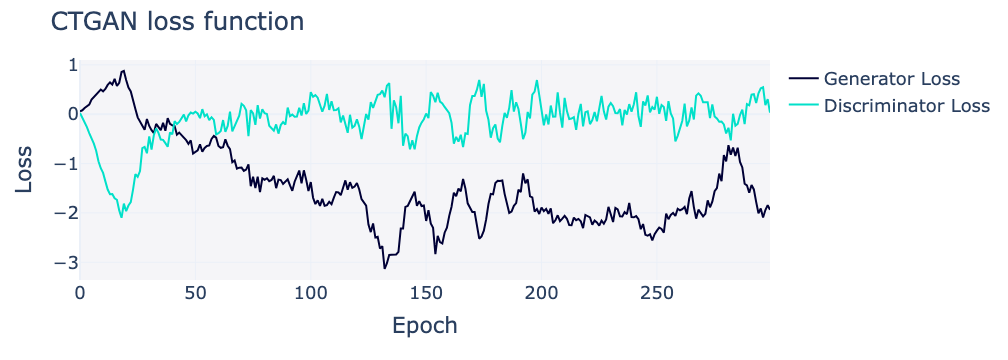

In [232]:
# Plot the trends of loss functions through epochs
fig_0 = synthesizer_0.get_loss_values_plot()
fig_0.show()

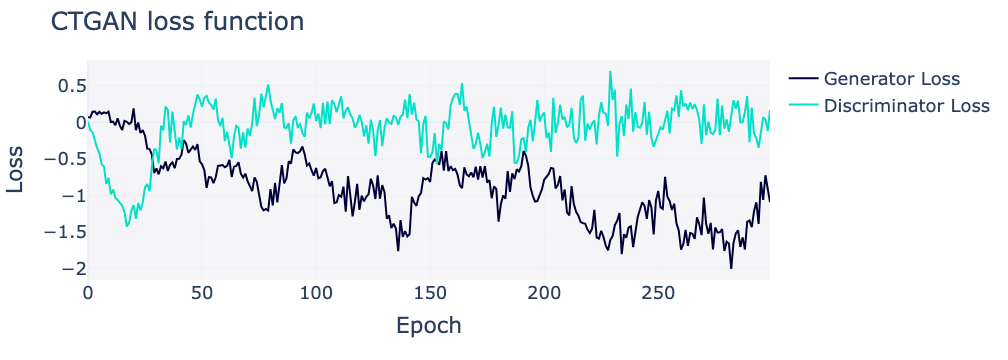

In [233]:
# Plot the trends of loss functions through epochs
fig_1 = synthesizer_1.get_loss_values_plot()
fig_1.show()

In [234]:
synthesizer_0_filepath = os.path.abspath('my_synthesizer_0.pkl')

# Save and the synthesizer
synthesizer_0.save(filepath=synthesizer_0_filepath)

# Load previously saved synthesizer
synthesizer_0 = CTGANSynthesizer.load(filepath=synthesizer_0_filepath)

In [235]:
synthesizer_1_filepath = os.path.abspath('my_synthesizer_1.pkl')

# Save and the synthesizer
synthesizer_1.save(filepath=synthesizer_1_filepath)

# Load previously saved synthesizer
synthesizer_1 = CTGANSynthesizer.load(filepath=synthesizer_1_filepath)

In [236]:
# Generate synthetic data
size = int(10e4)

synthesizer_0.reset_sampling()

X_0_ctgan = synthesizer_0.sample(
    num_rows=size, 
    output_file_path=None
)

In [237]:
# Generate synthetic data
size = int(10e4)

synthesizer_1.reset_sampling()

X_1_ctgan = synthesizer_1.sample(
    num_rows=size, 
    output_file_path=None
)

In [238]:
pd.set_option('display.max_rows', None)
# Compute and compare sample statistics
matrice_0 = umvar.mvsk_compare(X_0_norm, X_0_ctgan, side_by_side=True)
matrice_0

mean            \
                                                   Original Synthetic   
original_shape_Flatness                            0.553605  0.528176   
original_shape_LeastAxisLength                     0.194805  0.275251   
original_shape_MajorAxisLength                     0.306839  0.504273   
original_shape_Maximum2DDiameterColumn             0.234134  0.159465   
original_shape_Maximum2DDiameterSlice              0.316573  0.499793   
original_shape_MeshVolume                          0.062727  0.113440   
original_shape_MinorAxisLength                     0.244896  0.160426   
original_shape_Sphericity                          0.491025  0.687546   
original_shape_SurfaceArea                         0.119605  0.111228   
original_firstorder_10Percentile                   0.360367  0.154758   
original_firstorder_90Percentile                   0.691495  0.510917   
original_firstorder_Energy                         0.037318  0.054858   
original_firstorder_Entropy                        0.751475  0.548613   
original_firstorder_InterquartileRange             0.428331  0.318249   
original_firstorder_Kurtosis                       0.023586  0.031469   
original_firstorder_Maximum                        0.530707  0.524049   
original_firstorder_Mean                           0.608429  0.412814   
original_firstorder_Median                         0.800642  0.710905   
original_firstorder_Minimum                        0.602855  0.784839   
original_firstorder_Skewness                       0.865344  0.877264   
original_glcm_ClusterProminence                    0.685670  0.529571   
original_glcm_ClusterShade                         0.436524  0.431191   
original_glcm_ClusterTendency                      0.620359  0.770860   
original_glcm_Contrast                             0.514648  0.456763   
original_glcm_Imc1                                 0.584704  0.607178   
original_glcm_Imc2                                 0.635757  0.624877   
original_gldm_DependenceEntropy                    0.702240  0.853028   
original_gldm_DependenceNonUniformityNormalized    0.161008  0.128042   
original_gldm_DependenceVariance                   0.352972  0.431641   
original_gldm_LargeDependenceEmphasis              0.499363  0.277883   
original_gldm_LargeDependenceHighGrayLevelEmphasis 0.383262  0.621675   
original_gldm_LargeDependenceLowGrayLevelEmphasis  0.285793  0.422539   
original_gldm_SmallDependenceEmphasis              0.295933  0.092312   
original_gldm_SmallDependenceLowGrayLevelEmphasis  0.387399  0.221115   
original_glrlm_GrayLevelNonUniformityNormalized    0.219226  0.113401   
original_glrlm_HighGrayLevelRunEmphasis            0.471223  0.231252   
original_glrlm_LongRunEmphasis                     0.122466  0.057826   
original_glrlm_LongRunHighGrayLevelEmphasis        0.099325  0.117973   
original_glrlm_LongRunLowGrayLevelEmphasis         0.076029  0.100492   
original_glrlm_RunEntropy                          0.434801  0.457233   
original_glrlm_RunLengthNonUniformityNormalized    0.475496  0.203840   
original_glrlm_ShortRunLowGrayLevelEmphasis        0.577913  0.724569   
original_glszm_GrayLevelNonUniformity              0.044214  0.079527   
original_glszm_GrayLevelNonUniformityNormalized    0.357364  0.391057   
original_glszm_HighGrayLevelZoneEmphasis           0.510122  0.498703   
original_glszm_LargeAreaEmphasis                   0.057590  0.043343   
original_glszm_LargeAreaHighGrayLevelEmphasis      0.042716  0.016160   
original_glszm_LargeAreaLowGrayLevelEmphasis       0.069729  0.067810   
original_glszm_SizeZoneNonUniformityNormalized     0.409469  0.576528   
original_glszm_SmallAreaEmphasis                   0.547444  0.650743   
original_glszm_SmallAreaHighGrayLevelEmphasis      0.397253  0.589762   
original_glszm_SmallAreaLowGrayLevelEmphasis       0.426389  0.533280   
original_glszm_ZoneEntropy                         0.498185  0.643727   
original_glszm_ZonePercentage           

In [239]:
pd.set_option('display.max_rows', None)
# Compute and compare sample statistics
matrice_1 = umvar.mvsk_compare(X_1_norm, X_1_ctgan, side_by_side=True)
matrice_1

mean            \
                                                   Original Synthetic   
original_shape_Flatness                            0.592456  0.868208   
original_shape_LeastAxisLength                     0.283028  0.175044   
original_shape_MajorAxisLength                     0.297009  0.483857   
original_shape_Maximum2DDiameterColumn             0.287205  0.097644   
original_shape_Maximum2DDiameterSlice              0.316525  0.156768   
original_shape_MeshVolume                          0.102323  0.048150   
original_shape_MinorAxisLength                     0.255826  0.188304   
original_shape_Sphericity                          0.512068  0.131481   
original_shape_SurfaceArea                         0.124872  0.078630   
original_firstorder_10Percentile                   0.278516  0.084127   
original_firstorder_90Percentile                   0.793798  0.760425   
original_firstorder_Energy                         0.130147  0.117716   
original_firstorder_Entropy                        0.762766  0.786881   
original_firstorder_InterquartileRange             0.645760  0.488709   
original_firstorder_Kurtosis                       0.095330  0.143720   
original_firstorder_Maximum                        0.390003  0.387411   
original_firstorder_Mean                           0.520810  0.763510   
original_firstorder_Median                         0.648132  0.514138   
original_firstorder_Minimum                        0.496000  0.236053   
original_firstorder_Skewness                       0.635443  0.608179   
original_glcm_ClusterProminence                    0.567183  0.680371   
original_glcm_ClusterShade                         0.587012  0.706040   
original_glcm_ClusterTendency                      0.638093  0.403297   
original_glcm_Contrast                             0.642838  0.458120   
original_glcm_Imc1                                 0.549147  0.481646   
original_glcm_Imc2                                 0.670401  0.634532   
original_gldm_DependenceEntropy                    0.807453  0.710730   
original_gldm_DependenceNonUniformityNormalized    0.125915  0.186442   
original_gldm_DependenceVariance                   0.520555  0.524336   
original_gldm_LargeDependenceEmphasis              0.393250  0.632503   
original_gldm_LargeDependenceHighGrayLevelEmphasis 0.314705  0.487120   
original_gldm_LargeDependenceLowGrayLevelEmphasis  0.441224  0.247548   
original_gldm_SmallDependenceEmphasis              0.412808  0.276624   
original_gldm_SmallDependenceLowGrayLevelEmphasis  0.486658  0.771129   
original_glrlm_GrayLevelNonUniformityNormalized    0.230901  0.293288   
original_glrlm_HighGrayLevelRunEmphasis            0.476541  0.324832   
original_glrlm_LongRunEmphasis                     0.141379  0.069941   
original_glrlm_LongRunHighGrayLevelEmphasis        0.224397  0.060829   
original_glrlm_LongRunLowGrayLevelEmphasis         0.134835  0.189305   
original_glrlm_RunEntropy                          0.467234  0.321539   
original_glrlm_RunLengthNonUniformityNormalized    0.493567  0.867109   
original_glrlm_ShortRunLowGrayLevelEmphasis        0.574027  0.523128   
original_glszm_GrayLevelNonUniformity              0.098872  0.128689   
original_glszm_GrayLevelNonUniformityNormalized    0.444896  0.486101   
original_glszm_HighGrayLevelZoneEmphasis           0.680269  0.799361   
original_glszm_LargeAreaEmphasis                   0.163382  0.152310   
original_glszm_LargeAreaHighGrayLevelEmphasis      0.122792  0.167051   
original_glszm_LargeAreaLowGrayLevelEmphasis       0.174643  0.296805   
original_glszm_SizeZoneNonUniformityNormalized     0.397361  0.414455   
original_glszm_SmallAreaEmphasis                   0.676281  0.650081   
original_glszm_SmallAreaHighGrayLevelEmphasis      0.601701  0.618220   
original_glszm_SmallAreaLowGrayLevelEmphasis       0.467531  0.737063   
original_glszm_ZoneEntropy                         0.582650  0.540621   
original_glszm_ZonePercentage           

In [263]:
# Media
media_real_0 = []
for i in range (len(matrice_0)):
    media_real_0.append(matrice_0.iat[i, 0])
    
media_syn_0 = []
for i in range (len(matrice_0)):
    media_syn_0.append(matrice_0.iat[i, 1])  

err_1 = []
err_rel_1 = []

for i in range(len(matrice_0)):
    err_1.append(abs(media_real_0[i]-media_syn_0[i]))
    err_rel_1.append((abs(media_real_0[i]-media_syn_0[i])) / abs(media_real_0[i]))

err_medio_1 = sum(err_1)/len(err_1)
err_rel_medio_1 = sum(err_rel_1) / len(err_rel_1)
print(err_medio_1, err_rel_medio_1)


#Varianza
var_real_0 = []
for i in range (len(matrice_0)):
    var_real_0.append(matrice_0.iat[i, 2])
    
var_syn_0 = []
for i in range (len(matrice_0)):
    var_syn_0.append(matrice_0.iat[i, 3])  

err_2 = []
err_rel_2 = []

for i in range(len(matrice_0)):
    err_2.append(abs(var_real_0[i]-var_syn_0[i]))
    err_rel_2.append((abs(var_real_0[i]-var_syn_0[i])) / abs(var_real_0[i]))

err_medio_2 = sum(err_2)/len(err_2)
err_rel_medio_2 = sum(err_rel_2) / len(err_rel_2)
print(err_medio_2, err_rel_medio_2)


# Asimmetria
sk_real_0 = []
for i in range (len(matrice_0)):
    sk_real_0.append(matrice_0.iat[i, 4])
    
sk_syn_0 = []
for i in range (len(matrice_0)):
    sk_syn_0.append(matrice_0.iat[i, 5])  

err_3 = []
err_rel_3 = []

for i in range(len(matrice_0)):
    err_3.append(abs(sk_real_0[i]-sk_syn_0[i]))
    err_rel_3.append((abs(sk_real_0[i]-sk_syn_0[i])) / abs(sk_real_0[i]))

err_medio_3 = sum(err_3)/len(err_3)
err_rel_medio_3 = sum(err_rel_3) / len(err_rel_3)
print(err_medio_3, err_rel_medio_3)


# Curtosi
kur_real_0 = []
for i in range (len(matrice_0)):
    kur_real_0.append(matrice_0.iat[i, 6])
    
kur_syn_0 = []
for i in range (len(matrice_0)):
    kur_syn_0.append(matrice_0.iat[i, 7])  

err_4 = []
err_rel_4= []

for i in range(len(matrice_0)):
    err_4.append(abs(kur_real_0[i]-kur_syn_0[i]))
    err_rel_4.append((abs(kur_real_0[i]-kur_syn_0[i])) / abs(kur_real_0[i]))

err_medio_4 = sum(err_4)/len(err_4)
err_rel_medio_4 = sum(err_rel_4) / len(err_rel_4)
print(err_medio_4, err_rel_medio_4)

0.10262658345353785 0.31853352555367886
0.01726247137062368 0.39297655965201866
0.6442790370136833 1.1211671292094967
3.8569219456057175 14.190262834507308


In [266]:
# Media
media_real_1 = []
for i in range (len(matrice_1)):
    media_real_1.append(matrice_1.iat[i, 0])
    
media_syn_1 = []
for i in range (len(matrice_1)):
    media_syn_1.append(matrice_1.iat[i, 1])  

err_1 = []
err_rel_1 = []

for i in range(len(matrice_1)):
    err_1.append(abs(media_real_1[i]-media_syn_1[i]))
    err_rel_1.append((abs(media_real_1[i]-media_syn_1[i])) / abs(media_real_1[i]))

err_medio_1 = sum(err_1)/len(err_1)
err_rel_medio_1 = sum(err_rel_1) / len(err_rel_1)
print(err_medio_1, err_rel_medio_1)


#Varianza
var_real_1 = []
for i in range (len(matrice_1)):
    var_real_1.append(matrice_1.iat[i, 2])
    
var_syn_1 = []
for i in range (len(matrice_1)):
    var_syn_1.append(matrice_1.iat[i, 3])  

err_2 = []
err_rel_2 = []

for i in range(len(matrice_1)):
    err_2.append(abs(var_real_1[i]-var_syn_1[i]))
    err_rel_2.append((abs(var_real_1[i]-var_syn_1[i])) / abs(var_real_1[i]))

err_medio_2 = sum(err_2)/len(err_2)
err_rel_medio_2 = sum(err_rel_2) / len(err_rel_2)
print(err_medio_2, err_rel_medio_2)


# Asimmetria
sk_real_1 = []
for i in range (len(matrice_1)):
    sk_real_1.append(matrice_1.iat[i, 4])
    
sk_syn_1 = []
for i in range (len(matrice_1)):
    sk_syn_1.append(matrice_1.iat[i, 5])  

err_3 = []
err_rel_3 = []

for i in range(len(matrice_1)):
    err_3.append(abs(sk_real_1[i]-sk_syn_1[i]))
    err_rel_3.append((abs(sk_real_1[i]-sk_syn_1[i])) / abs(sk_real_1[i]))

err_medio_3 = sum(err_3)/len(err_3)
err_rel_medio_3 = sum(err_rel_3) / len(err_rel_3)
print(err_medio_3, err_rel_medio_3)


# Curtosi
kur_real_1 = []
for i in range (len(matrice_1)):
    kur_real_1.append(matrice_1.iat[i, 6])
    
kur_syn_1 = []
for i in range (len(matrice_1)):
    kur_syn_1.append(matrice_1.iat[i, 7])  

err_4 = []
err_rel_4= []

for i in range(len(matrice_1)):
    err_4.append(abs(kur_real_1[i]-kur_syn_1[i]))
    err_rel_4.append((abs(kur_real_1[i]-kur_syn_1[i])) / abs(kur_real_1[i]))

err_medio_4 = sum(err_4)/len(err_4)
err_rel_medio_4 = sum(err_rel_4) / len(err_rel_4)
print(err_medio_4, err_rel_medio_4)

0.11737583572958146 0.3306680607337704
0.018556397867989488 0.3231423471375142
0.6809973477968005 8.840800558955985
2.464669363723595 6.206625595776335


In [240]:
vett_0 = []

for i in range (len(matrice_0)):
    vett_0.append(matrice_0.iat[i, 7]) 

vett_0

[-1.169357283298823,
 5.7234754872976,
 -1.0880804562923836,
 3.6581952337653316,
 -0.7913015231211684,
 9.556933338258958,
 3.77762484742426,
 -0.45369426744120034,
 6.262765086813214,
 2.886809438462267,
 0.15510869192277355,
 21.351520883175755,
 -1.4594680178965975,
 -0.5823808173723943,
 69.27089672455381,
 -1.0409465071939175,
 -1.0003479450066985,
 1.0302180418526419,
 -0.15284945655759463,
 15.466715464318835,
 -0.5168458212340021,
 -0.9712305564117885,
 1.4498506559104225,
 -0.9732236171488546,
 -0.5421372771587678,
 -0.11297856006101625,
 4.696448271401233,
 5.799824903224602,
 -0.036219712889530964,
 0.07631403337813714,
 -1.1830515618258373,
 -0.2748507658476429,
 4.553399276484526,
 -0.056773512600376996,
 6.180842409314183,
 0.5070528144578308,
 30.47634661621757,
 12.85332178790067,
 9.88215952254627,
 -0.9794319834404606,
 0.767381197792413,
 -0.10237513083510619,
 13.695962074032764,
 -1.132806752323412,
 -1.078547508524907,
 49.782666431218985,
 97.58051995485435,
 31

In [241]:
for name in matrice_0.axes[0].tolist():
    print(name) 

original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterSlice
original_shape_MeshVolume
original_shape_MinorAxisLength
original_shape_Sphericity
original_shape_SurfaceArea
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Skewness
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_ClusterTendency
original_glcm_Contrast
original_glcm_Imc1
original_glcm_Imc2
original_gldm_DependenceEntropy
original_gldm_DependenceNonUniformityNormalized
original_gldm_DependenceVariance
original_gldm_LargeDependenceEmphasis
original_gldm_LargeDependenceHighGrayLevelEmphasis
original_gldm_LargeDependenceLowGrayLevelEmphasis

In [242]:
vett_1 = []

for i in range (len(matrice_1)):
    vett_1.append(matrice_1.iat[i, 7]) 

vett_1

[2.6561251748905077,
 2.390088293020538,
 -0.4126591721605841,
 6.251224749832101,
 1.2609088730049685,
 22.43314417818807,
 1.3160509015523898,
 2.4216628038431054,
 13.608056953832858,
 11.427141812864633,
 1.9434104827135528,
 8.270169904245883,
 1.8019244637815692,
 -0.11192713059640669,
 18.029638163959312,
 -0.9343210624711693,
 0.0949505132899513,
 -1.3063548120137165,
 0.0969515413896831,
 -0.23218329579737462,
 2.8066510720005695,
 -0.18835051816117865,
 -0.47547638595613595,
 -1.2005299354120713,
 -1.1305895524112188,
 -0.6383454940541862,
 2.2153338647218686,
 5.917506355809179,
 -1.2666258642223638,
 -0.8962190492102335,
 -0.25880959064195874,
 -0.0816018020962006,
 -0.0017375380828337228,
 0.25053762902344623,
 0.959126180850427,
 -0.6897520591382458,
 20.417532790764145,
 16.861599175681885,
 5.193789430686525,
 -0.8025129600222298,
 2.5776928952888714,
 -1.2309219496271222,
 6.672068516259397,
 -1.4171925450917673,
 2.6260992567900665,
 4.855852367031713,
 2.579716719422

In [243]:
for name in matrice_1.axes[0].tolist():
    print(name) 

original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterSlice
original_shape_MeshVolume
original_shape_MinorAxisLength
original_shape_Sphericity
original_shape_SurfaceArea
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Skewness
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_ClusterTendency
original_glcm_Contrast
original_glcm_Imc1
original_glcm_Imc2
original_gldm_DependenceEntropy
original_gldm_DependenceNonUniformityNormalized
original_gldm_DependenceVariance
original_gldm_LargeDependenceEmphasis
original_gldm_LargeDependenceHighGrayLevelEmphasis
original_gldm_LargeDependenceLowGrayLevelEmphasis